## How to Approach Machine Learning Projects
WorkFlow of ML Problems
![](https://i.imgur.com/kKdAALX.png)

These are step-by-step process for approaching ML problems:

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as supervised/unsupervised and regression/classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create training/test/validation sets and prepare the data for training ML models.
5. Create a quick & easy baseline model to evaluate and benchmark future models.
6. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.
7. Experiment and combine results from multiple strategies to get a better result.
8. Interpret models, study individual predictions, and present your findings.

In [178]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10,8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Step 1 - Understand Business Requirements & Nature of Data

<img src="https://i.imgur.com/63XEArk.png" width="640">


Most machine learning models are trained to serve a real-world use case. It's important to understand the business requirements, modeling objectives and the nature of the data available before you start building a machine learning model.

### Understanding the Big Picture

The first step in any machine learning problem is to read the given documentation, talk to various stakeholders and identify the following:

1. What is the business problem you're trying to solve using machine learning?
2. Why are we interested in solving this problem? What impact will it have on the business?
3. How is this problem solved currently, without any machine learning tools?
4. Who will use the results of this model, and how does it fit into other business processes?
5. How much historical data do we have, and how was it collected?
6. What features does the historical data contain? Does it contain the historical values for what we're trying to predict.
7. What are some known issues with the data (data entry errors, missing data, differences in units etc.)
8. Can we look at some sample rows from the dataset? How representative are they of the entire dataset.
9. Where is the data stored and how will you get access to it?
10. ...


Gather as much information about the problem as possible, so that you're clear understanding of the objective and feasibility of the project.

## Step 2 - Classify the problem as supervised/unsupervised & regression/classification

<img src="https://i.imgur.com/rqt2A7F.png" width="640">

Here's the landscape of machine learning([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">



Here are the topics in machine learning that we're studying in this course ([source](https://vas3k.com/blog/machine_learning/)):

<img src="https://i.imgur.com/VbVFAsg.png" width="640">



### Loss Functions and Evaluation Metrics

Once you have identified the type of problem you're solving, you need to pick an appropriate evaluation metric. Also, depending on the kind of model you train, your model will also use a loss/cost function to optimize during the training process.

* **Evaluation metrics** - they're used by humans to evaluate the ML model

* **Loss functions** - they're used by computers to optimize the ML model

They are often the same (e.g. RMSE for regression problems), but they can be different (e.g. Cross entropy and Accuracy for classification problems).


> **EXERCISE**: What are the appropriate loss function and evaluation metric for store sales prediction: https://www.kaggle.com/c/rossmann-store-sales ?

It's RMSPE (Root Mean Square Percentage Error).

## Step 3 - Download, clean & explore the data and create new features

<img src="https://i.imgur.com/0f7foe7.png" width="640">

### Downloading Data

There may be different sources to get the data:

* CSV files
* SQL databases
* Raw File URLs
* Kaggle datasets
* Google Drive
* Dropbox
* etc.

Identify the right tool/library to get the data.

For the Rossmann Store Sales prediction dataset, we'll use the `opendatasets` library. Make sure to [accept the competition rules](https://www.kaggle.com/c/rossmann-store-sales/rules) before executing the following cell.

In [179]:
ross_df = pd.read_csv('/content/train.csv', low_memory=False)

In [180]:
ross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [181]:
ross_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [182]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [183]:
store_df = pd.read_csv('/content/store.csv')

In [184]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [185]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


We can merge the two data frames to get richer set of features for each row of the training set.

In [186]:
merged_df = ross_df.merge(store_df, how='left', on = 'Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [187]:
test_df=pd.read_csv('/content/test.csv')

In [188]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [189]:
merged_test_df = test_df.merge(store_df, how='left', on='Store')
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## Data Cleaning
The first step is to check the column data types and identify if there are any null values.

In [190]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [191]:
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [192]:
merged_df.duplicated().sum()

np.int64(0)

Parse the Date

In [193]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)

In [194]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [195]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [196]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

### Exploratory Data Analysis and Visualization

Objectives of exploratory data analysis:

- Study the distributions of individual columns (uniform, normal, exponential)
- Detect anomalies or errors in the data (e.g. missing/incorrect values)
- Study the relationship of target column with other columns (linear, non-linear etc.)
- Gather insights about the problem and the dataset
- Come up with ideas for preprocessing and feature engineering



<Axes: xlabel='Sales', ylabel='Count'>

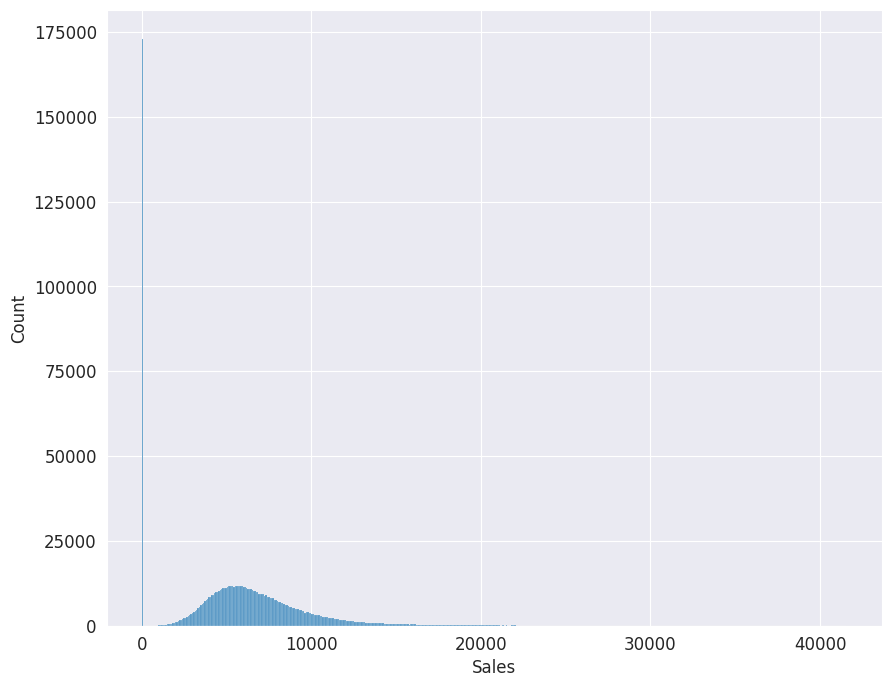

In [197]:
sns.histplot(data=merged_df, x='Sales')

In [198]:
merged_df.Open.value_counts()

,count
Open,
1,844392
0,172817


In [199]:
merged_df.Sales.value_counts()[0]

np.int64(172871)

In [200]:
merged_df = merged_df[merged_df.Open==1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

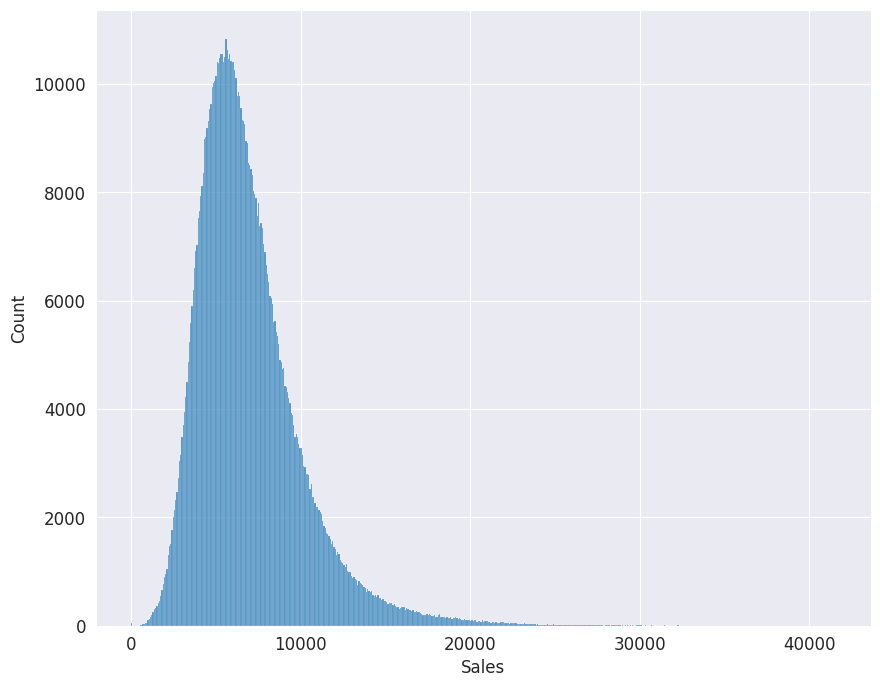

In [201]:
sns.histplot(data=merged_df, x='Sales')

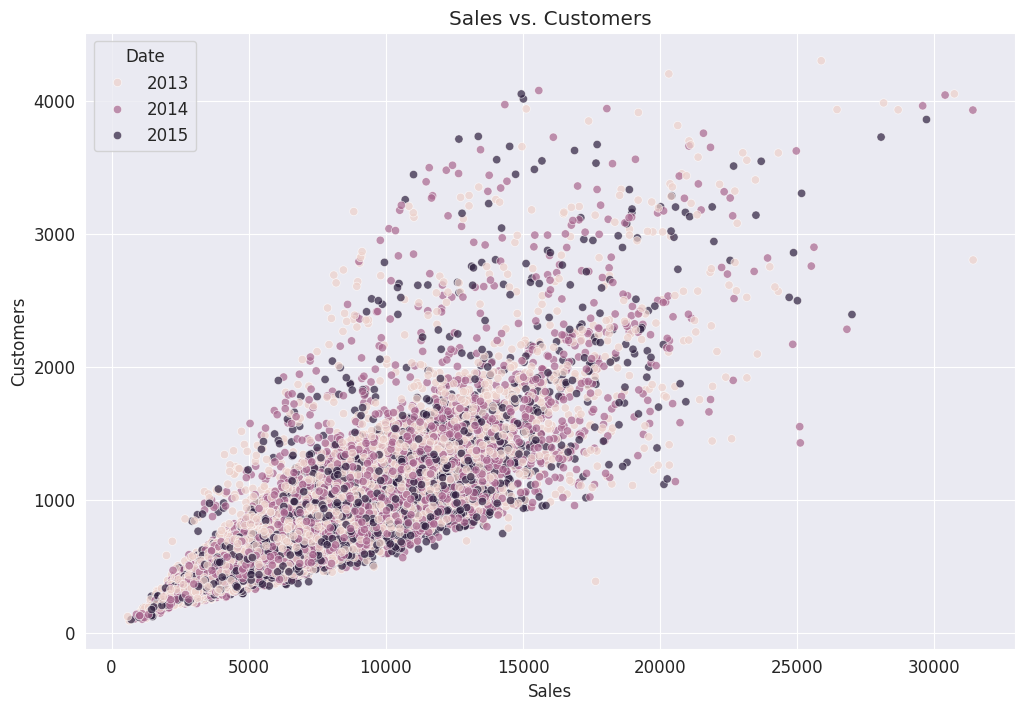

In [202]:
plt.figure(figsize=(12,8))
temp_df = merged_df.sample(30000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha = 0.7)
plt.title('Sales vs. Customers')
plt.show()

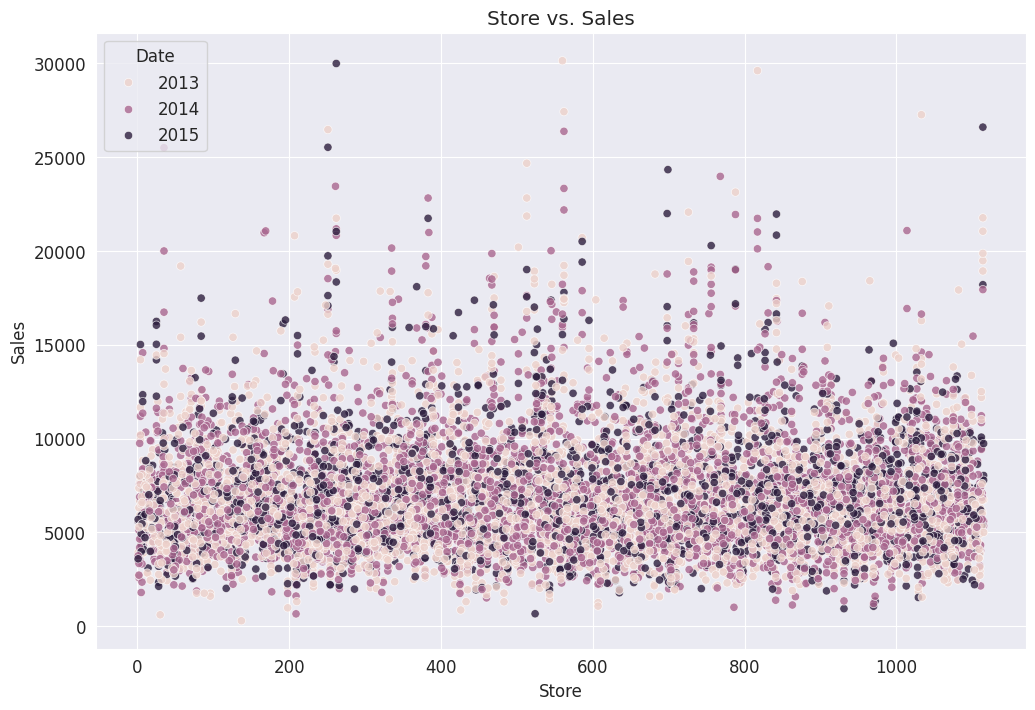

In [203]:
plt.figure(figsize=(12,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha = 0.8)
plt.title('Store vs. Sales')
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

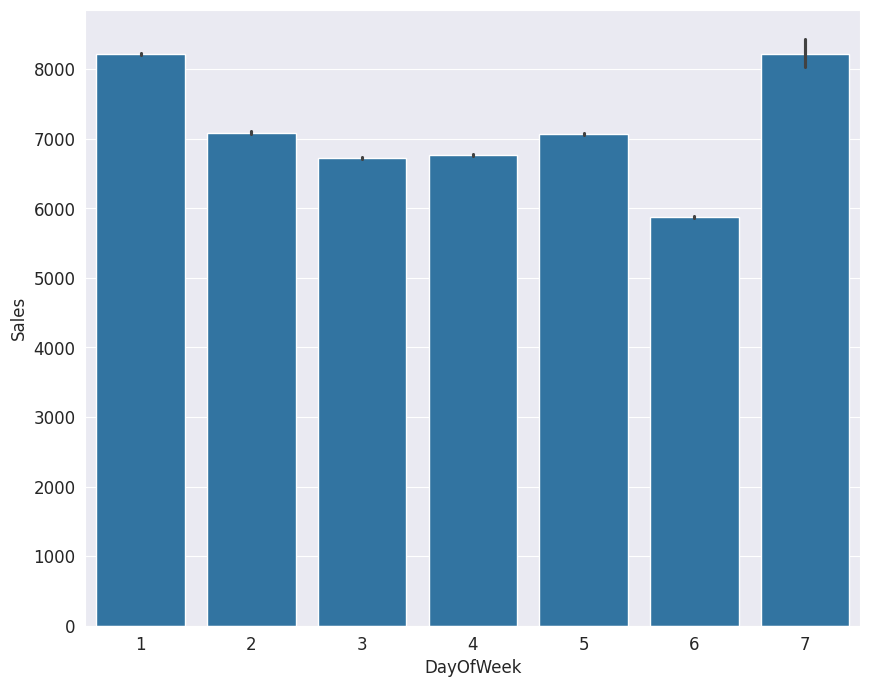

In [204]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

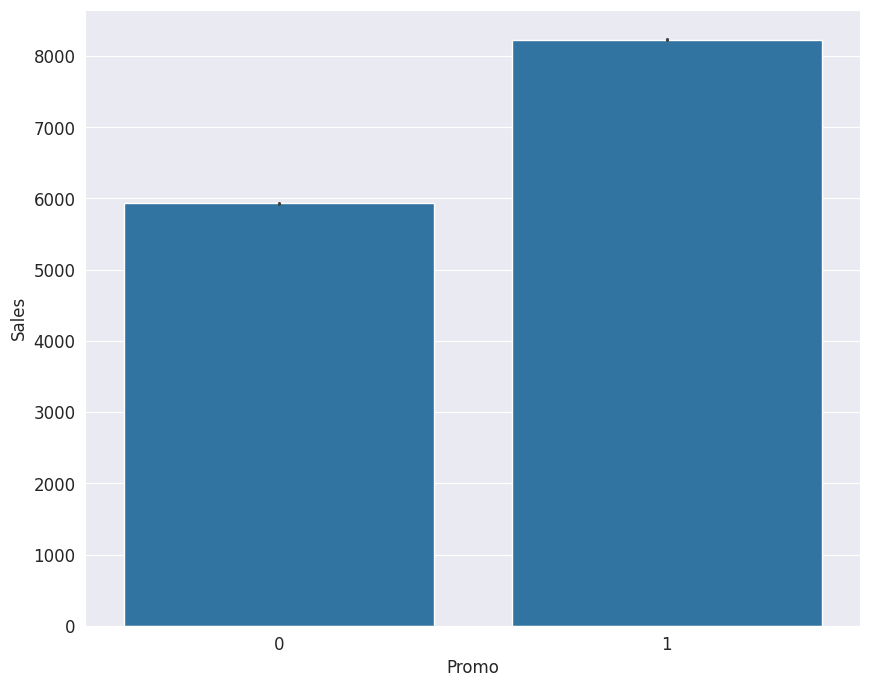

In [205]:
sns.barplot(data=merged_df, x='Promo', y='Sales')

In [206]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        842206 non-null  float64     

<Axes: xlabel='Promo2SinceWeek', ylabel='Sales'>

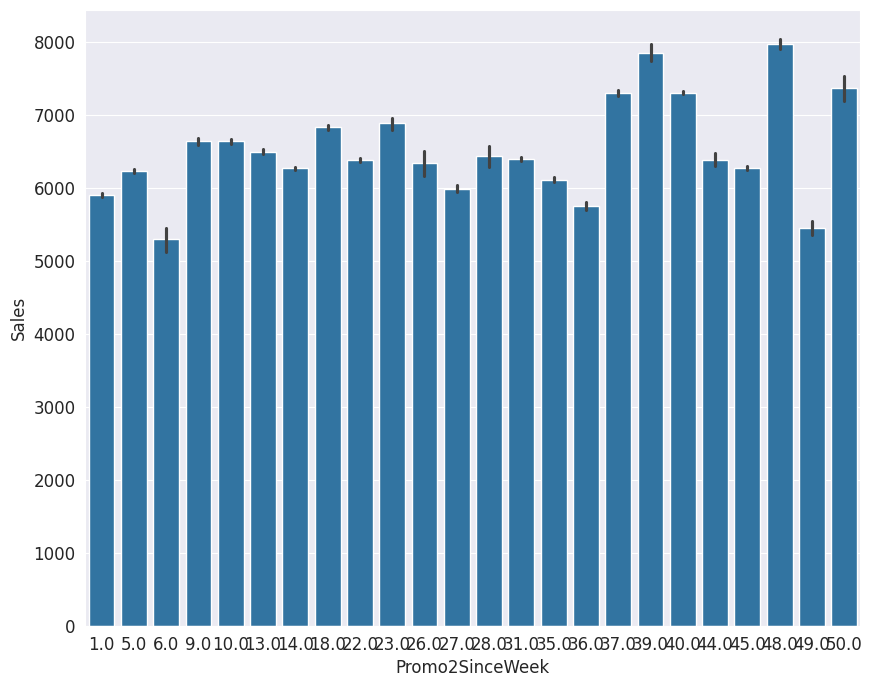

In [207]:
sns.barplot(data=merged_df, x='Promo2SinceWeek', y='Sales')

<Axes: xlabel='SchoolHoliday', ylabel='Sales'>

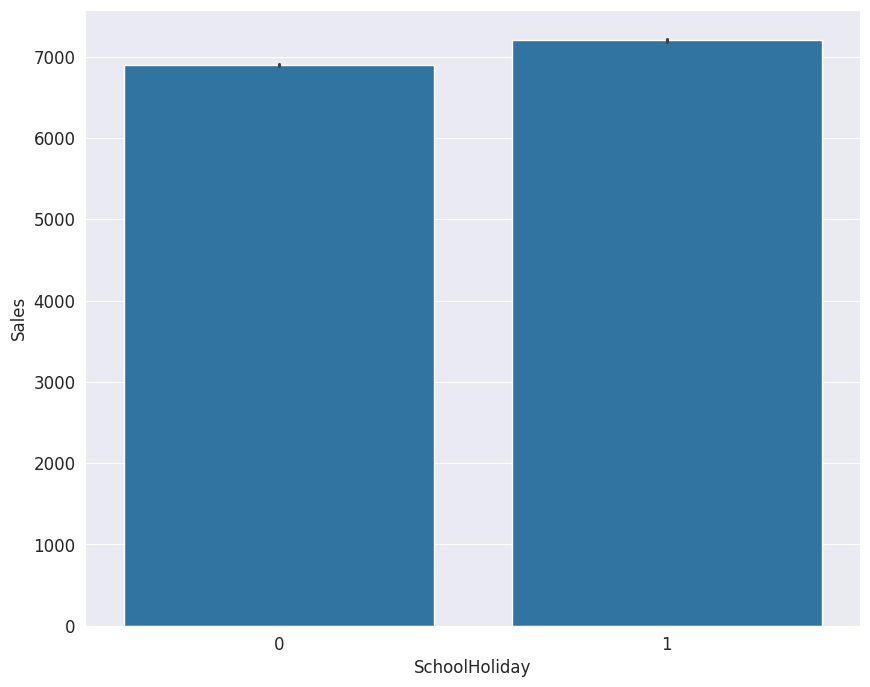

In [208]:
sns.barplot(data=merged_df, x='SchoolHoliday', y='Sales')

In [209]:
numeric_df = merged_df.select_dtypes(include=['number'])
display(numeric_df.corr()['Sales'].sort_values(ascending=False))

,Sales
Sales,1.000000
Customers,0.823597
Promo,0.368145
Promo2SinceWeek,0.095311
SchoolHoliday,0.038617
CompetitionOpenSinceYear,0.016101
Store,0.007710
Promo2SinceYear,-0.034713
CompetitionDistance,-0.036396
CompetitionOpenSinceMonth,-0.043489


### Feature Engineering

Feature engineer is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources.


For example, here are some features that can be extracted from the "Date" column:

1. Day of week
2. Day or month
3. Month
4. Year
5. Weekend/Weekday
6. Month/Quarter End


In [210]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [211]:
merged_test_df['Day'] = merged_df.Date.dt.day
merged_test_df['Month'] = merged_df.Date.dt.month
merged_test_df['Year'] = merged_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

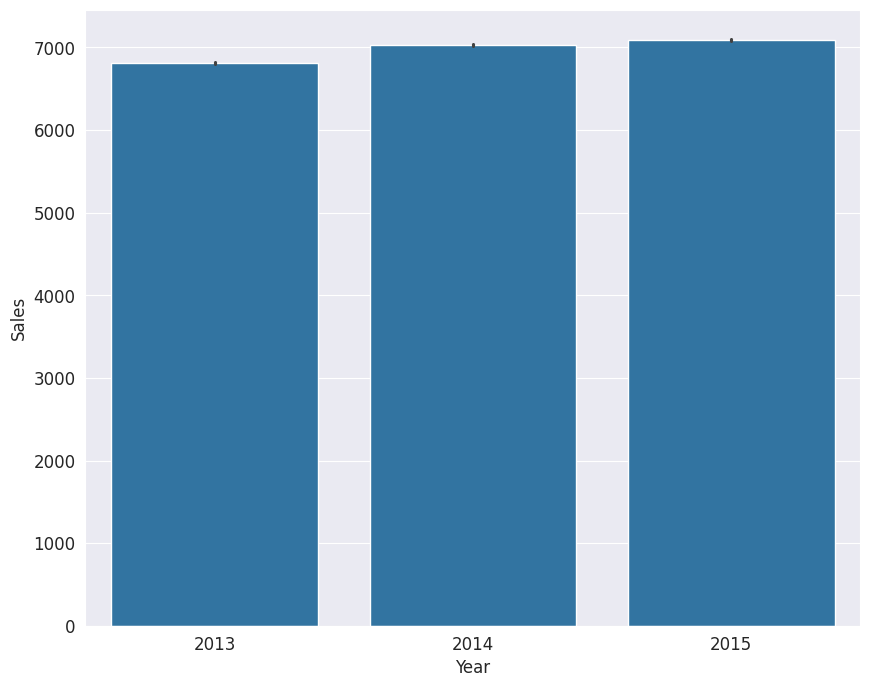

In [212]:
sns.barplot(data=merged_df, x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

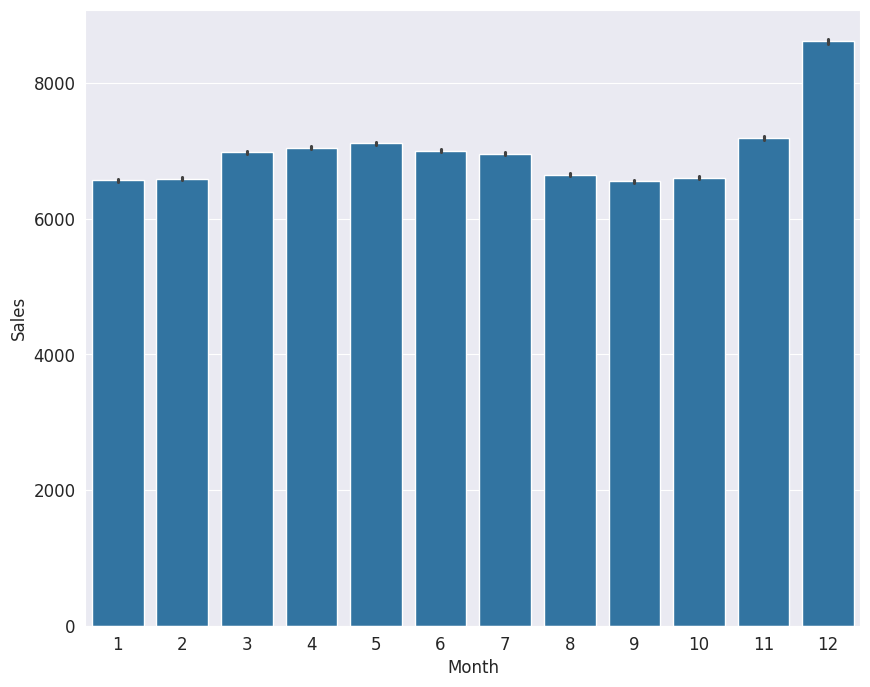

In [213]:
sns.barplot(data=merged_df, x='Month', y='Sales')

## Step 4 - Create a training/test/validation split and prepare the data for training

<img src="https://i.imgur.com/XZ9aP10.png" width="640">

### Train/Test/Validation Split

The data already contains a test set, which contains over one month of data after the end of the training set. We can apply a similar strategy to create a validation set. We'll the last 25% of rows for the validation set, after ordering by date

In [214]:
len(merged_df)

844392

In [215]:
train_size=int(.75 * len(merged_df))
train_size

633294

In [216]:
sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [217]:
len(train_df), len(val_df)

(633294, 211098)

In [218]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [219]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [220]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [221]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [222]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

### Input and Target columns

Let's also identify input and target columns. Note that we can't use the no. of customers as an input, because this information isn't available beforehand. Also, we needn't use all the available columns, we can start out with just a small subset.

In [223]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']

In [224]:
target_col = ['Sales']

Let's also seperate numeric columns and categorial columns

In [225]:
merged_df[input_cols].nunique()

,0
Store,1115
DayOfWeek,7
Promo,2
StateHoliday,4
StoreType,4
Assortment,3
Day,31
Month,12
Year,3


In [226]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()
test_inputs = merged_test_df[input_cols].copy()

In [227]:
train_target

,Sales
1017190,5961
1016179,4220
1016353,6851
1016356,17267
1016368,3102
...,...
256632,6897
256642,15736
256634,7444
256633,5207


In [228]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorial_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

### Imputation, Scaling and Encode

Let's impute missing data from numeric columns and scale the values to the $(0, 1)$ range.

In [229]:
from sklearn.impute import SimpleImputer

In [230]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [231]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [232]:
from sklearn.preprocessing import MinMaxScaler

In [233]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [234]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [235]:
from sklearn.preprocessing import OneHotEncoder

In [236]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorial_cols])
encoded_cols = list(encoder.get_feature_names_out(categorial_cols))

In [237]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorial_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorial_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorial_cols])

In [238]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]


In [239]:
X_train

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [240]:
train_target.mean()

,0
Sales,6873.179642


## Step 5 - Create quick & easy baseline models to benchmark future models

<img src="https://i.imgur.com/1DLgiEz.png" width="640">

A quick baseline model helps establish the minimum score any ML model you train should achieve.


### Fixed/Random Guess

Let's define a model that always returns the mean value of Sales as the prediction.

In [241]:
def return_mean(inputs):
  return np.full(len(inputs),merged_df.Sales.mean())

In [242]:
train_preds = return_mean(X_train)

In [243]:
train_target

,Sales
1017190,5961
1016179,4220
1016353,6851
1016356,17267
1016368,3102
...,...
256632,6897
256642,15736
256634,7444
256633,5207


In [244]:
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

We can evaluate this using RMSE score.

In [245]:
from sklearn.metrics import mean_squared_error

In [246]:
np.sqrt(mean_squared_error(train_preds, train_target))

np.float64(3082.450443277419)

In [247]:
np.sqrt(mean_squared_error(return_mean(X_val),val_target))

np.float64(3168.6033635047716)

In [248]:
def random_guess(inputs):
  low,high = 3000, 12000
  return np.random.random(len(inputs)) * (high - low)+low

In [249]:
train_preds = random_guess(X_train)

In [250]:
np.sqrt(mean_squared_error(train_preds, train_target))

np.float64(4075.696272473107)

## **Baseline Model**

In [251]:
from sklearn.linear_model import LinearRegression

In [252]:
lnreg = LinearRegression()

In [253]:
lnreg.fit(X_train, train_target)

LinearRegression()

`model.fit` uses the following workflow for training the model ([source](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html)):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


In [254]:
lnreg.coef_

array([[ 1.04613988e+02, -1.00014797e+02,  6.50678489e+02,
         1.04413753e+02,  9.88487856e+02, -1.25115344e+02,
        -3.95828726e+02, -3.97660124e+02, -7.18979775e+00,
        -6.37157355e+01,  1.02187074e+00, -1.13867445e+03,
         1.13867445e+03, -1.23115139e+02, -5.62555847e+01,
        -3.90512282e+01,  2.18421952e+02, -1.23677263e+03,
         4.17553271e+03, -1.34703585e+03, -1.59172423e+03,
         9.42626963e+02, -2.61870726e+03,  1.67608030e+03]])

In [255]:
X_train.columns

Index(['Store', 'Day', 'Month', 'Year', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [256]:
train_preds = lnreg.predict(X_train)

In [257]:
train_preds

array([[ 7115.08762455],
       [10581.38651873],
       [ 7036.39236244],
       ...,
       [ 6241.95353708],
       [ 5997.17125059],
       [ 5618.95124099]])

In [258]:
np.sqrt(mean_squared_error(train_preds, train_target))

np.float64(2741.587191916578)

In [259]:
val_pred = lnreg.predict(X_val)
np.sqrt(mean_squared_error(val_pred, val_target))

np.float64(2817.7797940117125)

## Step 6 - Pick a strategy, train a model & tune hyperparameters

<img src="https://i.imgur.com/aRuE5mw.png" width="640">


### Systematically Exploring Modeling Strategies

Scikit-learn offers the following cheatsheet to decide which model to pick.

<img src = "https://scikit-learn.org/1.3/_static/ml_map.png" width = 900>


Here's the general strategy to follow:

- Find out which models are applicable to the problem you're solving.
- Train a basic version for each type of model that's applicable
- Identify the modeling approaches that work well and tune their hypeparameters
- [Use a spreadsheet](https://docs.google.com/spreadsheets/d/1S42lnklqdj4hS3BohffyvZVJOFBZJ61VDiHLMuf2zBw/edit?usp=sharing) to keep track of your experiments and results.

In [260]:
model = LinearRegression()

In [261]:
def try_model(model):
  model.fit(X_train, train_target)

  train_preds = model.predict(X_train)
  val_pred = model.predict(X_val)
  train_rmse = np.sqrt(mean_squared_error(train_preds, train_target))
  val_rmse = np.sqrt(mean_squared_error(val_pred, val_target))
  return train_rmse, val_rmse

We are testing some different kind of Linear models:

In [262]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [263]:
try_model(LinearRegression())

(np.float64(2741.587191916578), np.float64(2817.7797940117125))

In [264]:
try_model(Ridge())

(np.float64(2741.5871950814444), np.float64(2817.7784665409868))

In [265]:
try_model(Lasso())

(np.float64(2741.7143904640566), np.float64(2817.9472924045217))

In [266]:
try_model(ElasticNet())

(np.float64(2879.0432103903954), np.float64(2972.6658860503385))

In [267]:
try_model(SGDRegressor())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(np.float64(2742.2454396660683), np.float64(2825.067336526569))

We are testing the model using tree model:

In [268]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [269]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

(np.float64(0.0), np.float64(1559.7378600480247))

Seems like tree model is far better compare to linear models.

[Text(0.5, 0.9, 'Promo_0 <= 0.5\nsquared_error = 9494721.741\nsamples = 633294\nvalue = 6873.18'),
 Text(0.25, 0.7, 'DayOfWeek_1 <= 0.5\nsquared_error = 10053046.41\nsamples = 280741\nvalue = 8160.121'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Month <= 0.955\nsquared_error = 8559596.144\nsamples = 223344\nvalue = 7757.247'),
 Text(0.0625, 0.3, 'StoreType_b <= 0.5\nsquared_error = 7967330.328\nsamples = 210684\nvalue = 7631.861'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Day <= 0.35\nsquared_error = 13800173.481\nsamples = 12660\nvalue = 9843.895'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Month <= 0.955\nsquared_error = 12775230.673\nsamples = 57397\nvalue = 9727.788'),
 Text(0.3125, 0.3, 'Day <= 0.95\nsquared_error = 11907411.6\nsamples = 54232\nvalue = 9578.715'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Day <= 0.2

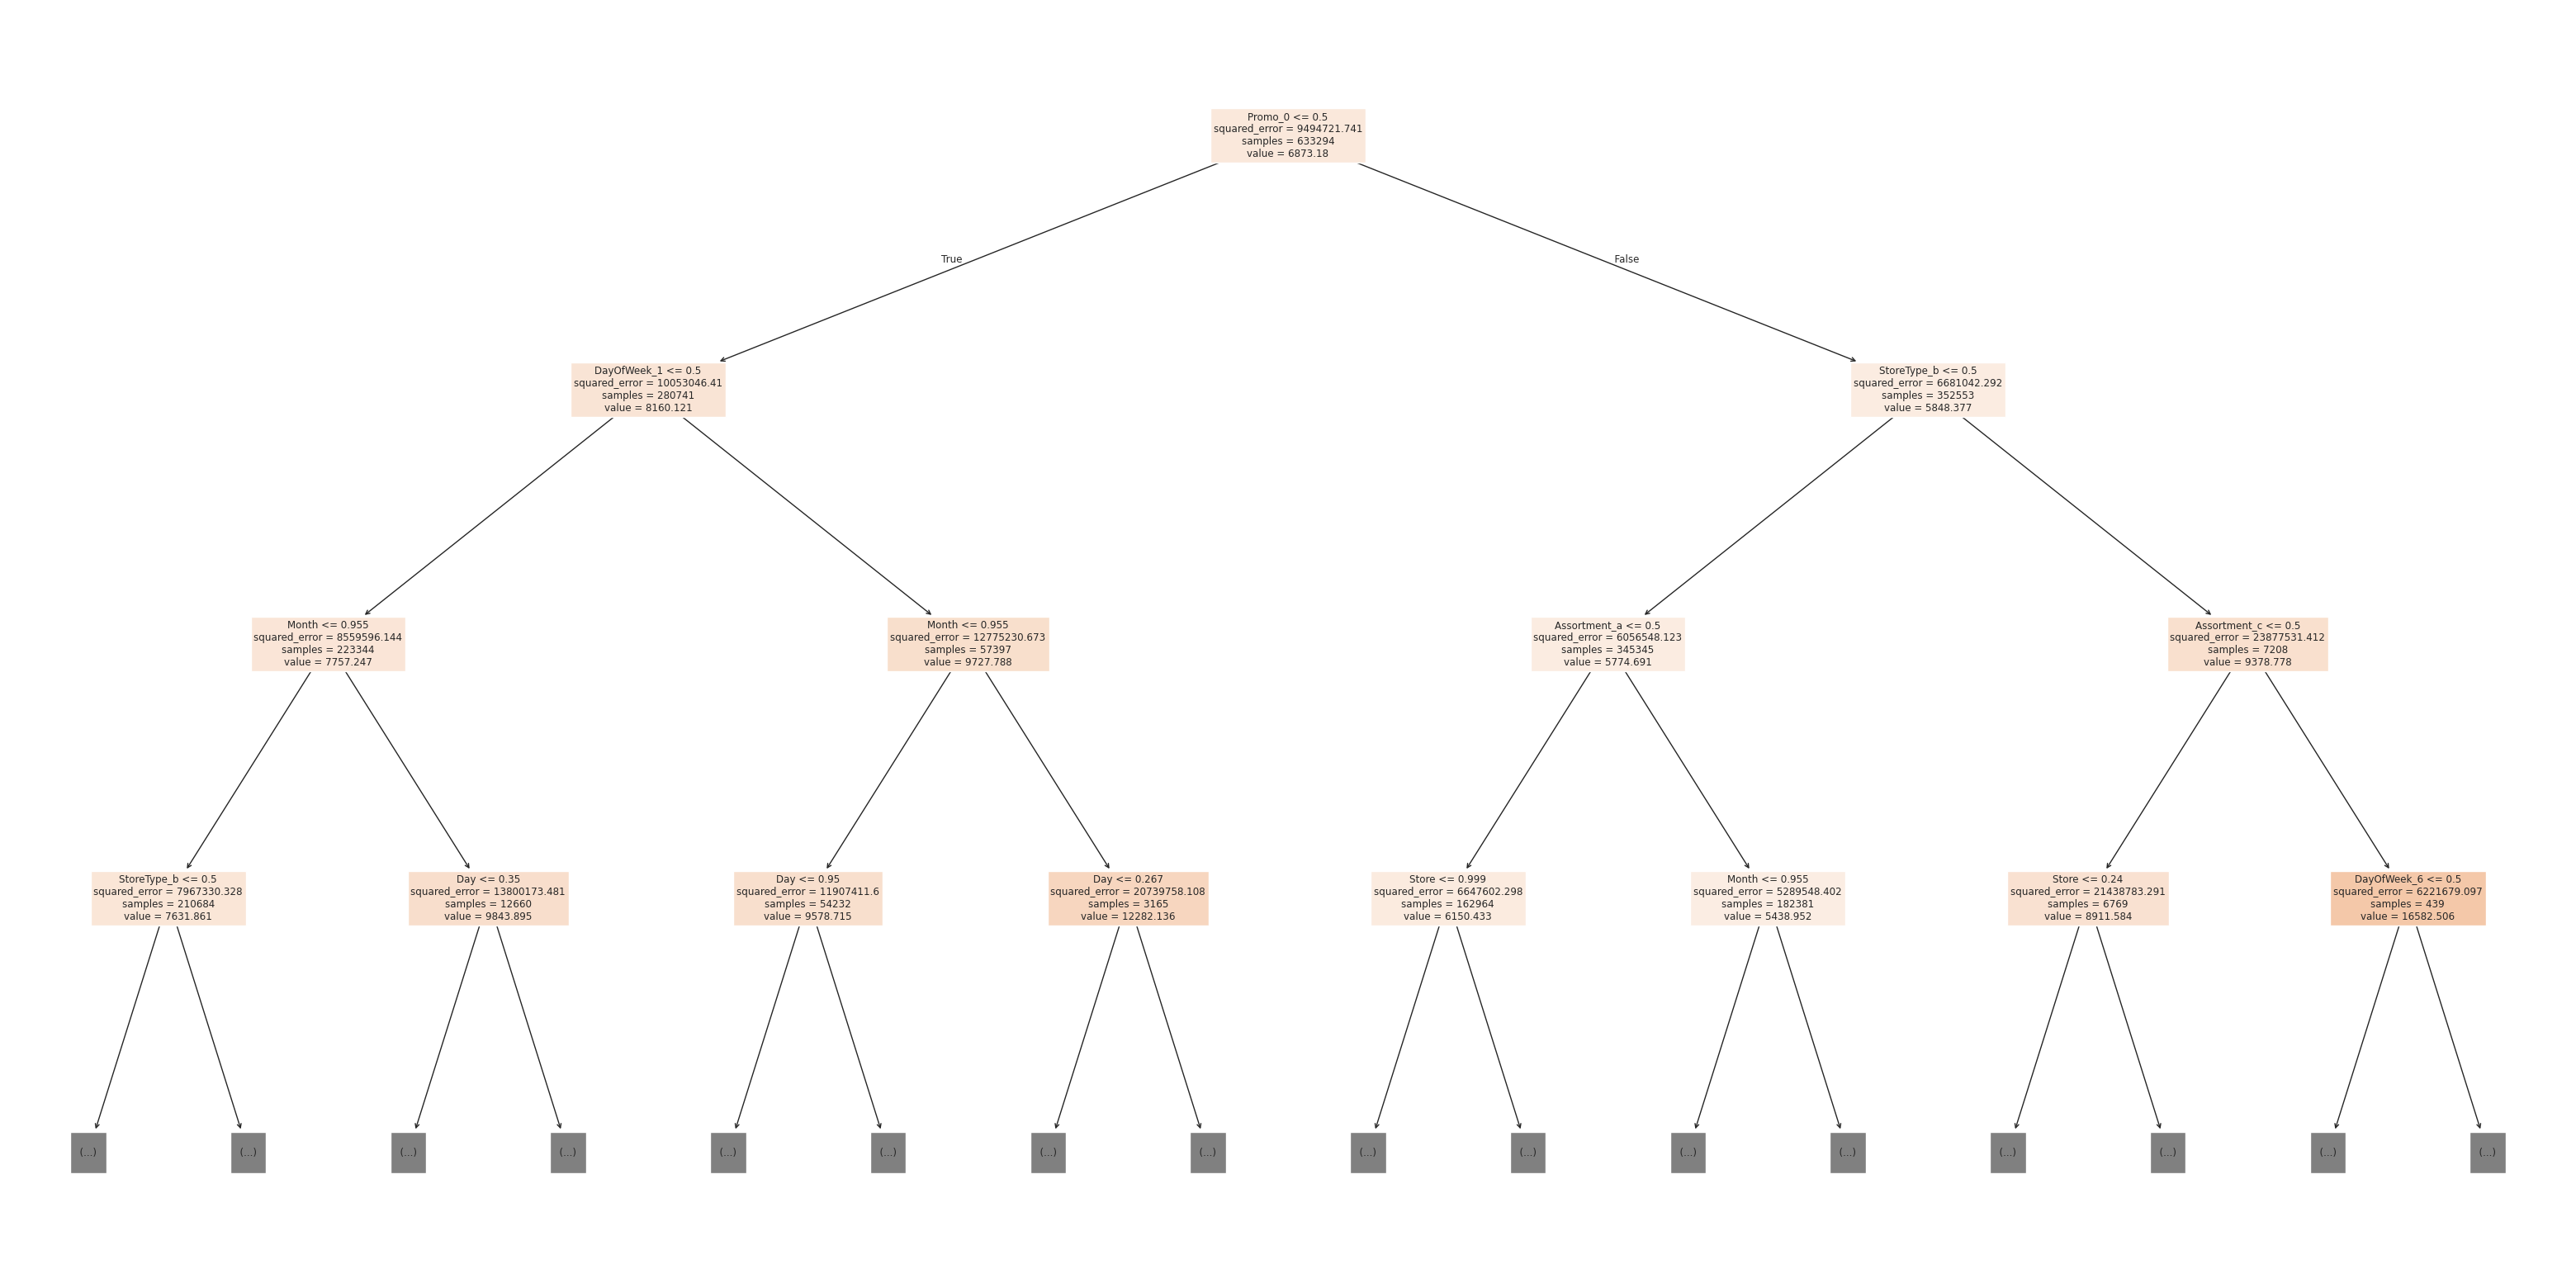

In [270]:
plt.figure(figsize= (40,20))
plot_tree(tree, max_depth= 3, filled=True, feature_names=numeric_cols + encoded_cols)

Let's try RandomForest.

In [271]:
from sklearn.ensemble import RandomForestRegressor

In [272]:
%time
rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators= 10)
try_model(rf)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(np.float64(561.3371197812796), np.float64(1422.3914589238575))

## Step 7 - Experiment and combine results from multiple strategies

<img src="https://i.imgur.com/ZqM6R8w.png" width="640">

In general, the following strategies can be used to improve the performance of a model:

- Gather more data. A greater amount of data can let you learn more relationships and generalize the model better.
- Include more features. The more relevant the features for predicting the target, the better the model gets.
- Tune the hyperparameters of the model. Increase the capacity of the model while ensuring that it doesn't overfit.
- Look at the specific examples where the model make incorrect or bad predictions and gather some insights
- Try strategies like grid search for hyperparameter optimization and K-fold cross validation
- Combine results from different types of models (ensembling), or train another model using their results.

### Hyperparameter Optimization & Grid Search

You can tune hyperparameters manually, our use an automated tuning strategy like random search or Grid search. Follow this tutorial for hyperparameter tuning using Grid search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

<img src="https://i.imgur.com/EJCrSZw.png" width="500">

In [273]:
from sklearn.model_selection import GridSearchCV

In [274]:
search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid={'max_depth': [3, 5, 7, 9]}, scoring='neg_mean_squared_error', n_jobs=-1)

In [275]:
try_model(search)

(np.float64(2530.189507388291), np.float64(2683.7393345190494))

### Ensembling and Stacking

Ensembling refers to combining the results of multiple models. Here's what ensembling looks like visually([source](https://www.kdnuggets.com/2019/01/ensemble-learning-5-main-approaches.html)):

<img src="https://i.imgur.com/rrOKVEd.png" width="480">


Stacking is a more advanced version of ensembling, where we train another model using the results from multiple models. Here's what stacking looks like visually ([source](https://medium.com/ml-research-lab/stacking-ensemble-meta-algorithms-for-improve-predictions-f4b4cf3b9237)):

<img src="https://i.imgur.com/VVzCWNB.png" width="400">

Here's a tutorial on stacking: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

## Step 8 - Interpret models, study individual predictions & present your findings

<img src="https://i.imgur.com/9axhOrA.png" width="640">

### Feature Importance

You'll need to explain why your model returns a particular result. Most scikit-learn models offer some kind of "feature importance" score.

In [276]:
X_train.columns

Index(['Store', 'Day', 'Month', 'Year', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [277]:
rf.feature_importances_

array([6.07425342e-01, 4.91239270e-02, 4.72165063e-02, 9.25604489e-03,
       3.36097195e-02, 4.27726442e-03, 2.38881155e-03, 2.07646382e-03,
       5.74281521e-03, 7.27414179e-03, 4.58875051e-03, 8.34051501e-02,
       5.56071149e-02, 1.17665524e-03, 1.95493006e-04, 2.61985762e-05,
       1.98474355e-05, 1.30273876e-02, 2.28136185e-02, 1.05062407e-02,
       1.36492796e-02, 8.17957818e-03, 5.39137541e-03, 1.30222733e-02])

In [278]:
important_df = pd.DataFrame({
    'feature': numeric_cols + encoded_cols,
    'importance': rf.feature_importances_
}).sort_values('importance',ascending =False)
important_df.head(10)

,feature,importance
0,Store,0.607425
11,Promo_0,0.083405
12,Promo_1,0.055607
1,Day,0.049124
2,Month,0.047217
4,DayOfWeek_1,0.033610
18,StoreType_b,0.022814
20,StoreType_d,0.013649
17,StoreType_a,0.013027
23,Assortment_c,0.013022


<Axes: xlabel='importance', ylabel='feature'>

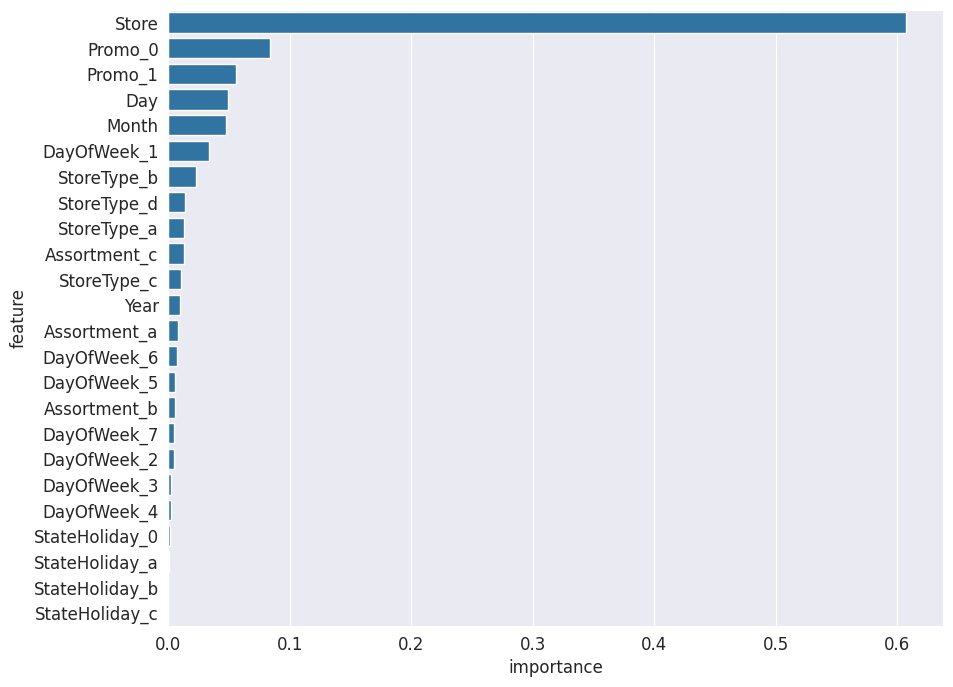

In [279]:
sns.barplot(data=important_df, x='importance', y='feature')

In [280]:
def predict_input(model,single_input):
  if single_input['Open'] ==0:
    return 0.
  input_df = pd.DataFrame([single_input])
  input_df['Date'] = pd.to_datetime(input_df.Date)
  input_df['Day'] = input_df.Date.dt.day
  input_df['Month'] = input_df.Date.dt.month
  input_df['Year'] = input_df.Date.dt.year
  input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
  input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
  input_df[encoded_cols] = encoder.transform(input_df[categorial_cols])
  X_input = input_df[numeric_cols + encoded_cols]
  pred = model.predict(X_input)[0]
  return pred

In [283]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [281]:
sample_input = {'Id': 41084,
 'Store': 1111,
 'DayOfWeek': 6,
 'Date': '2015-08-1 00:00:00',
 'Open': 1.0,
 'Promo': 0,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}

sample_input

{'Id': 41084,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [282]:
predict_input(rf,sample_input)

np.float64(4170.5)

### Presenting your results

* Create a presentation for non-technical stakeholders
* Understand your audience - figure out what they care about most
* Avoid showing any code or technical jargon, include visualizations
* Focus on metrics that are relevant for the business
* Talk about feature importance and how to interpret results
* Explain the strengths and limitations of the model
* Explain how the model can be improved over time

### Model Deployment

At this point, the model can be handed over to a software developer / ML engineer who can put the model into production, as part of an existing software system. It's important to monitor the results of the model, and make improvements from time to time.

Check out this tutorial on how to deploy a model to the Heroku platform using the Flask framework: https://towardsdatascience.com/create-an-api-to-deploy-machine-learning-models-using-flask-and-heroku-67a011800c50

## Summary

![](https://i.imgur.com/kKdAALX.png)

Here's the summary of the step-by-step process you should follow to approach any machine learning problem:

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as supervised/unsupervised and regression/classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create training/test/validation sets and prepare the data for training ML models.
5. Create a quick & easy baseline model to evaluate and benchmark future models.
5. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.
6. Experiment and combine results from multiple strategies to get a better overall result.
7. Interpret models, study individual predictions, and present your findings.

